# 实验五：Logistic回归

### 概述
&ensp;&ensp;本实验介绍Logistic回归具体应用。

### 实验环境
+ Ubuntu
+ Jupyter NoteBook

### 实验目标
完成本实验后，您能够

1. 通过本实验进一步掌握Logistic回归回归算法的原理。
2. 掌握如何使用Logistic回归解决实际问题。
3. 掌握使用机器学习方法解决现实世界问题的流程。

### 任务：Logistic回归
#### 【任务目标】
本次实战内容，将使用Logistic回归来预测患疝气病的马的存活问题，数据集已经下载好了，放在当前实验的数据集目录下，可直接使用。
这里的数据包含了368个样本和28个特征。疝气病不一定源自马的肠胃问题，其他问题也可能引发马疝病。该数据集中包含了医院检测马疝病的一些指标，有的指标比较主观，有的指标难以测量，例如马的疼痛级别。另外需要说明的是，除了部分指标主观和难以测量外，该数据还存在一个问题，数据集中有30%的值是缺失的。下面将首先介绍如何处理数据集中的数据缺失问题，然后再利用Logistic回归和随机梯度上升算法来预测病马的生死。
#### 【任务步骤】
1. 传入特征组和标签，以及学习率和搜索步数
2. 利用梯度上升算法得到回归系数
3. 进行预测
#### 【梯度上升算法介绍】
梯度上升算法是什么？J(θ)太复杂，我们先看个简单的求极大值的例子： 
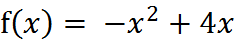
这个函数的极值怎么求？显然这个函数开口向下，存在极大值，它的函数图像为：
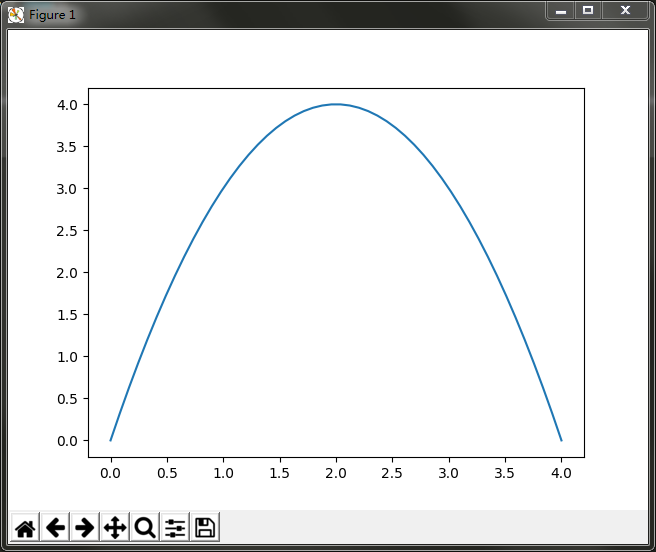
求极值，先求函数的导数：
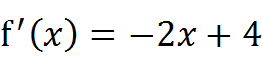
令导数为0，可求出x=2即取得函数f(x)的极大值。极大值等于f(2)=4
但是真实环境中的函数不会像上面这么简单，就算求出了函数的导数，也很难精确计算出函数的极值。此时我们就可以用迭代的方法来做。就像爬坡一样，一点一点逼近极值。这种寻找最佳拟合参数的方法，就是最优化算法。爬坡这个动作用数学公式表达即为：
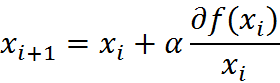
其中，α为步长，也就是学习速率，控制更新的幅度。效果如下图所示：
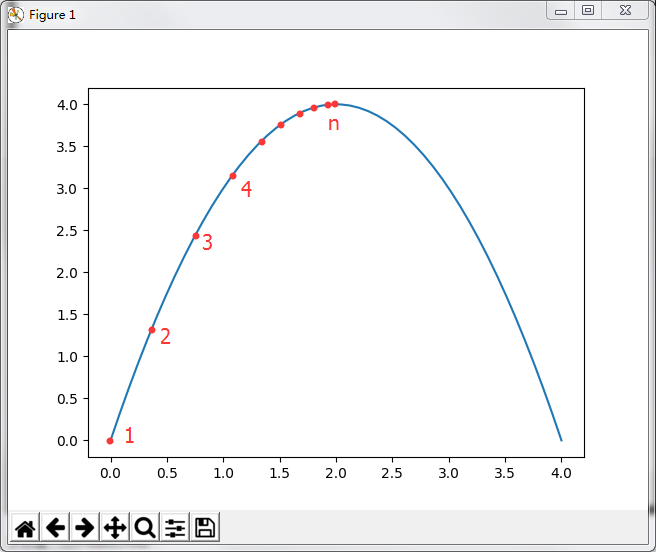
比如从(0,0)开始，迭代路径就是1->2->3->4->…->n，直到求出的x为函数极大值的近似值，停止迭代。我们可以编写Python3代码，来实现这一过程：

In [3]:
#导入程序必要的包
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression

In [ ]:
"""
函数说明:sigmoid函数

Parameters:
    inX - 数据
Returns:
    sigmoid函数
"""
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))



In [ ]:
"""
函数说明:梯度上升算法

Parameters:
    dataMatrix  - 数据数组
    classLabels - 数据标签
    alpha       - 学习率
     n          - 最大迭代次数
Returns:
    weights - 求得的回归系数数组(最优参数)
"""
def stocGradAscent(dataMatrix, classLabels, alpha = 0.001, n = 150):
#### Start Code Here ####
    #返回dataMatrix的大小。m为行数,n为列数
   
     
    #参数初始化weights 
    
    
    #随机梯度, 循环150,观察是否收敛
     for j in range(numIter):
            dataIndex = list(range(m))
            for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            alpha = 4 / (1.0 + j + i) + 0.0001
            
            # 随机产生一个 0～len()之间的一个值
            # random.uniform(x, y) 方法将随机生成下一个实数，它在[x,y]范围内,x是这个范围内的最小值，y是这个范围内的最大值。
            
            
            # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn
                
             
            #真实值和预测值之间的误差
            
            
            #更新回归系数
            
            
            #删除已经使用的样本
            del(dataIndex[randIndex])
            
    return weights    

In [6]:
"""
函数说明:使用Python写的Logistic分类器做预测

Parameters:
    无
Returns:
    无
"""
def colicTest():
    #打开训练集
    frTrain = open('horseColicTraining.txt') 
    
    #打开测试集
    frTest = open('horseColicTest.txt') 

    #构造数据集trainingSet和标签列trainingLabels，其中最后一列为标签列
  
    
    #逐行读取训练文件
    for line in frTrain.readlines():
        #使用strip、split函数先后对行字符进行处理
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
            
        #向训练数据集和标签列添加数据    
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[-1]))

        #使用改进的随机上升梯度训练
        
        
        #初始化预测错误的个数和测试集的个数
        
        
    #逐行读取测试文件
    for line in frTest.readlines():
            #测试样本数量加1
            numTestVec += 1.0
            
            #使用strip、split函数先后对行字符进行处理
            currLine = line.strip().split('\t')
            lineArr =[]
            for i in range(len(currLine)-1):
                lineArr.append(float(currLine[i]))
                
            #预测错误的情况
            if int(classifyVector(np.array(lineArr), trainWeights)) != int(currLine[-1]):
                errorCount += 1
                
    #错误率计算
        
        
#### End Code Here #### 
    print("随机梯度上升测试集错误率为: %.2f%%" % errorRate)



"""
函数说明:分类函数

Parameters:
    inX - 特征向量
    weights - 回归系数
Returns:
    分类结果
"""
#把测试集上每个特征向量乘以最优化方法得来的回归系数，再将乘积结果求和
#最后输入到Sigmoid函数中即可。如果对应的Sigmoid值大于0.5就预测类别标签为1，否则为0。
def classifyVector(inX, weights):
#### Start Code Here ####
    
    
    
#### End Code Here #### 

if __name__ == '__main__':
    colicTest()

cross entropy = -inf


C:\Users\10211\classification_metrics.py:4: RuntimeWarning: divide by zero encountered in log
  return np.average(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))
